In [1]:
import pandas as pd
import numpy as np
from scipy.stats import beta
import pylab as plt

def plot(betas, nombres, x):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

# Recopilación de datos modelo 'A'

In [2]:
df = pd.DataFrame(columns=['Test', 'Buscador', 'Producto', 'Categoría'])
df

,Test,Buscador,Producto,Categoría


In [31]:
df.Test = ['A']*15
df.Buscador = [0,0,1,1,0,1,1,1,1,1,0,0,0,0,0]
df.Producto = [0,1,1,1,1,1,1,1,0,0,0,1,0,1,0]
df.Categoría = [1,0,0,0,1,1,1,1,1,1,0,0,1,1,1]
df.head()

,Test,Buscador,Producto,Categoría
0,A,0,0,1
1,A,0,1,0
2,A,1,1,0
3,A,1,1,0
4,A,0,1,1


### Observaciones:

Durante la recopilación de datos se le ha pedido al usuario que vaya narrando las acciones que desea ejecutar para visitar la página. Aunque no se puedan cuantificar de manera numérica, algunas de ellas se han repetido y pueden ser interesantes para la modificación del diseño de la página.

- No funciona la opción de registro.
- El banner de descuentos esta muy pequeño.
- Opción de búsqueda por marca de producto.
- Muchos productos agotados (ajeno al diseño de la página web).
- Opción de ofertas más visible.
- Problemas para encontrar el inicio.

# Recopilación de datos modelo 'B'

In [4]:
df2 = pd.DataFrame(columns=['Test', 'Buscador', 'Producto', 'Categoría'])

In [5]:
df2.Test = ['B']*15
df2.Buscador = [0,0,1,0,1,0,1,0,0,0,0]+[1,1,0,0]
df2.Producto = [1,1,0,0,0,1,0,1,0,0,0]+[0,1,1,0]
df2.Categoría = [1,1,1,1,1,1,1,1,1,1,1]+[1,0,1,1]
df2.head()

,Test,Buscador,Producto,Categoría
0,B,0,1,1
1,B,0,1,1
2,B,1,0,1
3,B,0,0,1
4,B,1,0,1


### Definición de las variables

En los contrastes de hipótesis se van a definir como muestra de control el modelo A, y como muestra de testeo el modelo B.

# Unión de ambos dataframe

In [6]:
data = pd.concat([df, df2], axis=0)
data.reset_index(inplace=True)
data.head()

,index,Test,Buscador,Producto,Categoría
0,0,A,0,0,1
1,1,A,0,1,0
2,2,A,1,1,0
3,3,A,1,1,0
4,4,A,0,1,1


# Buscador

In [7]:
# Buscador

imps_ctrl1, convs_ctrl1= len(data[data['Test']=='A']), len(data[(data['Test']=='A') & (data['Buscador']==1)])
imps_test1, convs_test1= len(data[data['Test']=='B']), len(data[(data['Test']=='B') & (data['Buscador']==1)])

CR_ctrl1=convs_ctrl1/imps_ctrl1
CR_test1=convs_test1/imps_test1

print(f'TASAS RET1: Control={CR_ctrl1}, Test={CR_test1}')

TASAS RET1: Control=0.4666666666666667, Test=0.3333333333333333


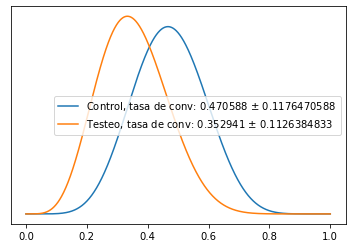

In [20]:
# Testeo

a_C, b_C = convs_ctrl1+1, imps_ctrl1-convs_ctrl1+1
a_T, b_T = convs_test1+1, imps_test1-convs_test1+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)
x=np.linspace(0, 1, 1000)

plot([beta_control, beta_test], ['Control', 'Testeo'], x)

In [30]:
salto=abs((beta_test.mean()-beta_control.mean())/beta_control.mean())

prob=beta.cdf(0.409, a_T, b_T)

prob=float(prob)

'''El test disminuye la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test disminuye la tasa de conversion en un 25.00%, con una probabilidad del 69.74%'

# Producto

In [10]:
# Producto

imps_ctrl2, convs_ctrl2= len(data[data['Test']=='A']), len(data[(data['Test']=='A') & (data['Producto']==1)])
imps_test2, convs_test2= len(data[data['Test']=='B']), len(data[(data['Test']=='B') & (data['Producto']==1)])

CR_ctrl2=convs_ctrl2/imps_ctrl2
CR_test2=convs_test2/imps_test2

print(f'TASAS RET7: Control={CR_ctrl2}, Test={CR_test2}')

TASAS RET7: Control=0.6, Test=0.4


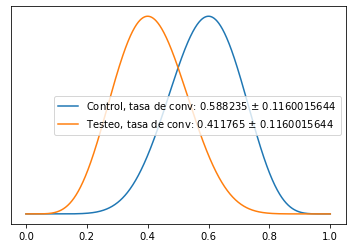

In [23]:
# Testeo

a_C2, b_C2 = convs_ctrl2+1, imps_ctrl1-convs_ctrl2+1
a_T2, b_T2 = convs_test2+1, imps_test2-convs_test2+1

beta_control2=beta(a_C2, b_C2)
beta_test2=beta(a_T2, b_T2)
x2=np.linspace(0, 1, 1000)

plot([beta_control2, beta_test2], ['Control', 'Testeo'], x2)

In [29]:
salto2=abs((beta_test2.mean()-beta_control2.mean())/beta_control2.mean())

prob2=beta.cdf(0.5, a_T2, b_T2)

prob2=float(prob2)

'''El test disminuye la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto2*100, prob2*100)

'El test disminuye la tasa de conversion en un 30.00%, con una probabilidad del 77.28%'

# Categoría

In [12]:
# Categoría

imps_ctrl3, convs_ctrl3= len(data[data['Test']=='A']), len(data[(data['Test']=='A') & (data['Categoría']==1)])
imps_test3, convs_test3= len(data[data['Test']=='B']), len(data[(data['Test']=='B') & (data['Categoría']==1)])

CR_ctrl3=convs_ctrl3/imps_ctrl3
CR_test3=convs_test3/imps_test3

print(f'TASAS RET7: Control={CR_ctrl3}, Test={CR_test3}')

TASAS RET7: Control=0.6666666666666666, Test=0.9333333333333333


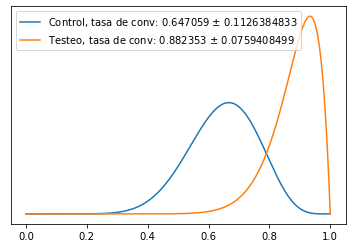

0.6470588235294118 0.8823529411764706


In [28]:
# Testeo

a_C3, b_C3 = convs_ctrl3+1, imps_ctrl3-convs_ctrl3+1
a_T3, b_T3 = convs_test3+1, imps_test3-convs_test3+1

beta_control3=beta(a_C3, b_C3)
beta_test3=beta(a_T3, b_T3)
x3=np.linspace(0, 1, 1000)

plot([beta_control3, beta_test3], ['Control', 'Testeo'], x3)
print(beta_control3.mean(), beta_test3.mean())

In [26]:
salto3=(beta_test3.mean()-beta_control3.mean())/beta_control3.mean()

prob3=1-beta.cdf(0.79, a_T3, b_T3)

prob3=float(prob3)

'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto3*100, prob3*100)

'El test aumenta la tasa de conversion en un 36.36%, con una probabilidad del 87.91%'